Positions: [[ 3.15872428  4.40343055  5.15044997]
 [ 4.61606973  1.95118862  0.87944189]
 [ 9.34549471  5.81126044  3.9577585 ]
 [ 7.84131028  3.98864398  9.50044837]
 [ 4.21563384  6.18593437  7.88586683]]
Total energy: -0.0173615272027
Calculated minimum energy: -10.0


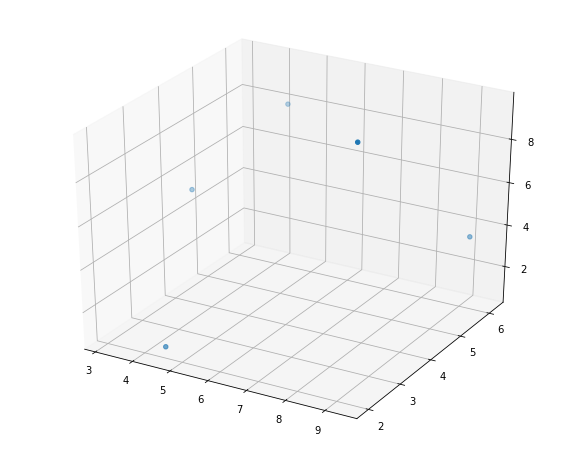

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import differential_evolution

def LJ(r):
    r6 = r**6
    r12 = r**12
    return 4*(1/r12 - 1/r6)

def get_r_values(positions):
    """
    Returns total energy of LJ cluster.
    
    parameters: positions -- N x 3 2d-array of the (x,y,z) positions of each atom.
    return: total energy of LJ cluster.
    """
    # calculate distances between each pair of atoms (store results as r_values)
    p = positions
    r_values = []
    for i in range(len(positions)):
        for j in range(i, len(positions)):
            if i != j:
                distance = np.sqrt((p[i,0]-p[j,0])**2 + (p[i,1]-p[j,1])**2 + (p[i,2]-p[j,2])**2)
                r_values.append(p[i,0])
                
    return r_values

def get_total_energy(r_values):
    # calculate LJ energies of each distance and return the sum
    E = 0
    for r in r_values:
        E += LJ(r)
    return E
    
    
# set parameters
r_min, r_max = 1, 3
N = 5

# calculate total energy
positions = []
bounds = []
for i in range(N):
    positions.append(10 * np.random.random(3))
positions = np.asarray(positions)
r_values = get_r_values(positions)
for i in range(len(r_values)):
    bounds.append((r_min, r_max))
print("Positions:", positions)
total_energy = get_total_energy(r_values)
print("Total energy:", total_energy)

# minimize energy
res = differential_evolution(get_total_energy, bounds)
print("Calculated minimum energy:", res.fun)

# plot
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection="3d")
ax.scatter3D(positions[:,0], 
             positions[:,1], 
             positions[:,2])

plt.show()

In [51]:
help(differential_evolution)

Help on function differential_evolution in module scipy.optimize._differentialevolution:

differential_evolution(func, bounds, args=(), strategy='best1bin', maxiter=1000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0)
    Finds the global minimum of a multivariate function.
    Differential Evolution is stochastic in nature (does not use gradient
    methods) to find the minimium, and can search large areas of candidate
    space, but often requires larger numbers of function evaluations than
    conventional gradient based techniques.
    
    The algorithm is due to Storn and Price [1]_.
    
    Parameters
    ----------
    func : callable
        The objective function to be minimized.  Must be in the form
        ``f(x, *args)``, where ``x`` is the argument in the form of a 1-D array
        and ``args`` is a  tuple of any additional fixed parameters needed to
        completely specify